In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

In [21]:
raw_data= pd.read_csv('Final_raw_data.csv')

In [22]:
raw_data.head()

,email_acq,auth_revenue,decile_rank_last_1_yr,time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,...,gender,age_group,income_group,hh_adult_qty,hh_children_qty,ethnicity,urbanicity,wm_pdp_visits,avg_basket_value_delta_flag,Flag
0,31575A9249FA4B03,4994.04,1,2.133333,2.133333,1,119.99,1,1,0,...,OTHERS,OTHERS,OTHERS,NaN,NaN,OTHERS,OTHERS,2,0,1
1,70AE20723A829D14,4992.30,1,20.233333,0.800000,2,13.59,2,5,1,...,OTHERS,OTHERS,OTHERS,NaN,NaN,OTHERS,OTHERS,11,0,1
2,3F44C4CE1836644A,4991.78,1,8.500000,8.500000,3,278.96,3,3,1,...,M,MILLENNIALS,MEDIUM,1.0,0.0,ASIANS,SEMI URBAN,4,1,1
3,F6B9A9EC3F0C9C18,4991.59,1,0.100000,0.100000,1,289.35,1,5,0,...,OTHERS,OTHERS,OTHERS,NaN,NaN,OTHERS,OTHERS,37,0,1
4,3D04EEAB92DEE61,4979.28,1,58.166667,6.200000,1,54.81,1,1,5,...,F,MILLENNIALS,MEDIUM,2.0,0.0,CAUCASIANS,SEMI URBAN,25,1,1


In [23]:
raw_data=raw_data.fillna(0)

In [24]:
gender_columns=pd.get_dummies(raw_data, columns=['gender', 'age_group', 'income_group', 'ethnicity', 'urbanicity'], drop_first=True)
gender_columns.head()

,email_acq,auth_revenue,decile_rank_last_1_yr,time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,...,income_group_MEDIUM,income_group_OTHERS,ethnicity_ASIANS,ethnicity_CAUCASIANS,ethnicity_HISPANICS,ethnicity_OTHERS,ethnicity_UNKNOWN,urbanicity_RURAL,urbanicity_SEMI URBAN,urbanicity_URBAN
0,31575A9249FA4B03,4994.04,1,2.133333,2.133333,1,119.99,1,1,0,...,0,1,0,0,0,1,0,0,0,0
1,70AE20723A829D14,4992.30,1,20.233333,0.800000,2,13.59,2,5,1,...,0,1,0,0,0,1,0,0,0,0
2,3F44C4CE1836644A,4991.78,1,8.500000,8.500000,3,278.96,3,3,1,...,1,0,1,0,0,0,0,0,1,0
3,F6B9A9EC3F0C9C18,4991.59,1,0.100000,0.100000,1,289.35,1,5,0,...,0,1,0,0,0,1,0,0,0,0
4,3D04EEAB92DEE61,4979.28,1,58.166667,6.200000,1,54.81,1,1,5,...,1,0,0,1,0,0,0,0,1,0


In [25]:
data= gender_columns
data=data.drop(['email_acq'], axis=1)
h2od=data
data=data.drop(['Flag'], axis=1)

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data, raw_data['Flag'], test_size=0.3, random_state=0)

# Feature Engineering

In [27]:
raw_data.corr()

,auth_revenue,decile_rank_last_1_yr,time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,auth_revenue_lt_edl,...,no_divisions_per_order,no_super_depts_per_order,no_depts_per_order,top_brand_revenue_percent,avg_dwell_time,hh_adult_qty,hh_children_qty,wm_pdp_visits,avg_basket_value_delta_flag,Flag
auth_revenue,1.000000,-0.712720,-0.047063,-0.031151,0.009883,0.084699,0.005983,0.005933,-0.017203,0.028124,...,0.007963,-0.005166,-0.003311,0.026547,0.002618,-0.036519,0.004460,0.102174,0.001670,0.690210
decile_rank_last_1_yr,-0.712720,1.000000,0.044549,0.025447,0.003065,-0.094868,-0.003275,-0.003712,0.043827,-0.018599,...,-0.004393,0.020587,0.022062,-0.037062,-0.002759,0.033799,-0.012586,-0.086836,0.011298,-0.741053
time_bn_wm_and_home,-0.047063,0.044549,1.000000,0.206368,-0.027219,-0.024154,-0.026898,0.033661,-0.021599,-0.020745,...,-0.034914,-0.039695,-0.041593,-0.007477,0.006533,0.121552,0.089381,-0.082246,0.056992,-0.042044
time_bn_last_wm_and_home,-0.031151,0.025447,0.206368,1.000000,-0.035902,-0.044325,-0.046481,0.022412,0.041312,0.050267,...,-0.045345,-0.049658,-0.051624,0.018193,0.001258,0.046583,0.026923,-0.060292,0.220434,-0.022154
no_items_lt,0.009883,0.003065,-0.027219,-0.035902,1.000000,0.105159,0.412072,0.163426,0.595685,0.185989,...,0.345722,0.521158,0.607605,-0.006098,-0.002109,-0.020364,0.006220,0.039767,0.084205,0.005825
auth_revenue_lt,0.084699,-0.094868,-0.024154,-0.044325,0.105159,1.000000,0.116425,0.017138,0.000508,0.186850,...,0.083462,0.059148,0.056834,0.184561,-0.004133,-0.007422,-0.000440,-0.002898,0.109253,0.072892
no_divisions_lt,0.005983,-0.003275,-0.026898,-0.046481,0.412072,0.116425,1.000000,0.035426,0.149006,0.038414,...,0.766783,0.597201,0.489129,0.016490,-0.003637,-0.017493,0.004969,0.033890,0.050347,0.005787
auth_qty_lt,0.005933,-0.003712,0.033661,0.022412,0.163426,0.017138,0.035426,1.000000,0.100191,0.059323,...,0.024747,0.055744,0.072790,-0.030219,0.015970,0.006269,0.010825,-0.012792,0.031892,0.003211
no_items_lt_edl,-0.017203,0.043827,-0.021599,0.041312,0.595685,0.000508,0.149006,0.100191,1.000000,0.433885,...,0.193077,0.428810,0.526771,-0.051199,-0.002065,-0.016326,-0.019227,0.047103,0.121046,-0.019997
auth_revenue_lt_edl,0.028124,-0.018599,-0.020745,0.050267,0.185989,0.186850,0.038414,0.059323,0.433885,1.000000,...,0.062430,0.132470,0.167364,0.032301,-0.003795,-0.009430,-0.021372,0.038514,0.114043,0.020859


In [28]:
data.describe()

,auth_revenue,decile_rank_last_1_yr,time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,auth_revenue_lt_edl,...,income_group_MEDIUM,income_group_OTHERS,ethnicity_ASIANS,ethnicity_CAUCASIANS,ethnicity_HISPANICS,ethnicity_OTHERS,ethnicity_UNKNOWN,urbanicity_RURAL,urbanicity_SEMI URBAN,urbanicity_URBAN
count,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,...,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000,374489.000000
mean,270.502394,50.498586,32.226075,6.000288,1.928895,70.322950,1.137959,3.992830,0.883778,17.970779,...,0.283928,0.209624,0.035568,0.525457,0.102817,0.208484,0.013659,0.121988,0.288185,0.380922
std,338.332708,28.865352,36.757901,3.726852,2.124024,110.004453,0.390564,15.892646,1.865504,42.975183,...,0.450903,0.407041,0.185212,0.499352,0.303721,0.406225,0.116069,0.327272,0.452918,0.485614
min,1.930000,1.000000,0.033333,0.033333,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.840000,25.000000,4.933333,2.833333,1.000000,16.940000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.960000,50.000000,16.066667,5.633333,1.000000,38.390000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,325.980000,75.000000,48.566667,9.433333,2.000000,75.990000,1.000000,3.000000,1.000000,21.770000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4994.040000,100.000000,167.966667,12.166667,33.000000,5216.000000,5.000000,2468.000000,33.000000,4981.540000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100, 
                                        criterion ='gini') 
  
# Training the model 
extra_tree_forest.fit(x_train, y_train) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0)

NameError: name 'x_train' is not defined

In [ ]:
x_train.columns

In [12]:
feature_importance_normalized

NameError: name 'feature_importance_normalized' is not defined

In [127]:
matrix=[x_train.columns, feature_importance_normalized]

In [128]:
matrix

[Index(['auth_revenue', 'decile_rank_last_1_yr', 'time_bn_wm_and_home',
        'time_bn_last_wm_and_home', 'no_items_lt', 'auth_revenue_lt',
        'no_divisions_lt', 'auth_qty_lt', 'no_items_lt_edl',
        'auth_revenue_lt_edl', 'no_super_depts_lt_edl', 'auth_qty_lt_edl',
        'avg_wm_order_gap', 'avg_ent_order_gap', 'avg_enp_order_gap',
        'avg_edl_order_gap', 'avg_fashion_order_gap', 'aov_wm', 'ent_aov',
        'enp_aov', 'edl_aov', 'fashion_aov', 'first_order_wm_gmv',
        'holiday_gmv', 'non_holiday_gmv', 'total_gmv', 'avg_basket_value_delta',
        'avg_basket_size_delta', 'no_home_visits', 'no_wm_visits',
        'no_home_pdp_visits', 'home_pdp_conversion_rate', 'no_home_page_views',
        'no_wm_page_views', 'no_divisions_per_order',
        'no_super_depts_per_order', 'no_depts_per_order',
        'top_brand_revenue_percent', 'avg_dwell_time', 'hh_adult_qty',
        'hh_children_qty', 'wm_pdp_visits', 'avg_basket_value_delta_flag',
        'gender_M', 'gen

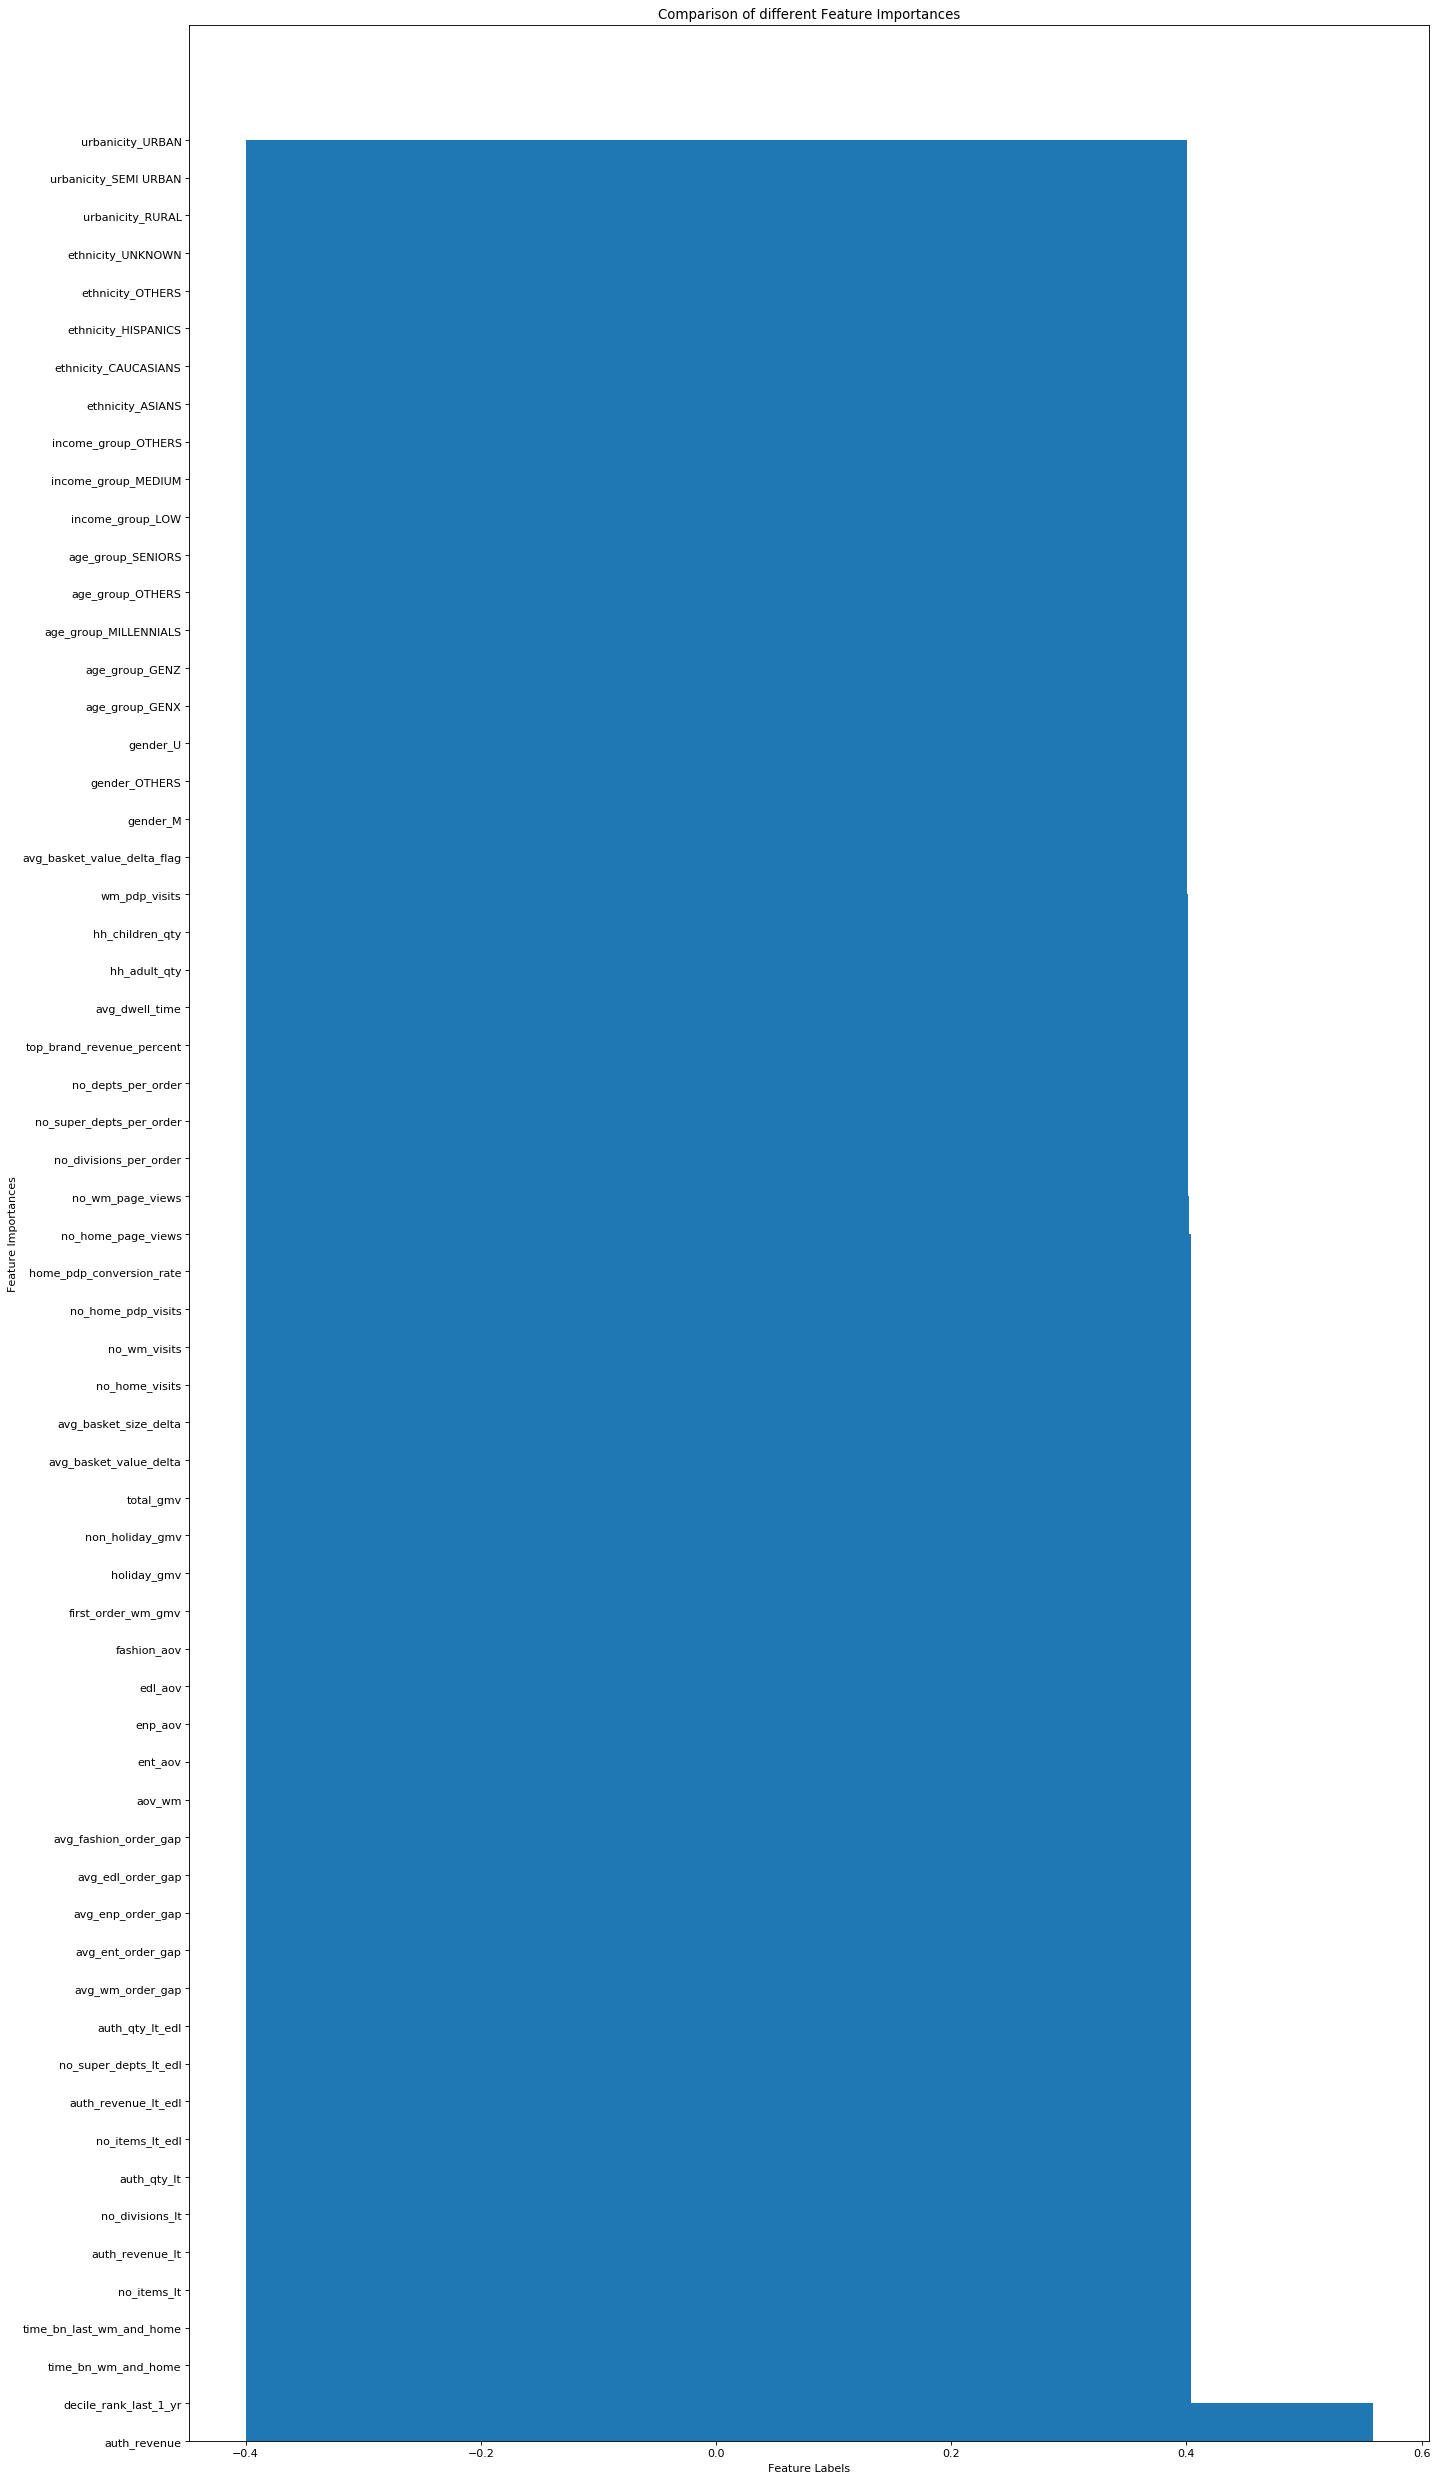

In [129]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 40), dpi=80, facecolor='w', edgecolor='k')
plt.bar(feature_importance_normalized, x_train.columns) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [130]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

ModuleNotFoundError: No module named 'mlbox'

In [ ]:

opt = Optimiser(scoring = 'accuracy', n_folds = 3)

In [ ]:
best = opt.optimise(space, df,15)

In [ ]:
prd = Predictor()
prd.fit_predict(best, df)

In [49]:
train.to_csv (r'C:\Users\praneeth.p\Documents\Praneeth\NoteBooks\GITHUB\Tredence\LTR analysis\train.csv', index = False, header=True)
test.to_csv (r'C:\Users\praneeth.p\Documents\Praneeth\NoteBooks\GITHUB\Tredence\LTR analysis\test.csv', index = False, header=True)

AttributeError: 'H2OFrame' object has no attribute 'to_csv'

In [87]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator


In [51]:
from h2o.automl import H2OAutoML

In [52]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,14 hours 30 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 8 days
H2O cluster name:,H2O_from_python_praneeth_p_umnl3n
H2O cluster total nodes:,1
H2O cluster free memory:,1.247 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [115]:
train=h2o.import_file("train.csv")
testh=h2o.import_file("test buf.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [116]:
testh.shape

(99008, 62)

In [94]:
test

auth_revenue,decile_rank_last_1_yr,time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,auth_revenue_lt_edl,no_super_depts_lt_edl,auth_qty_lt_edl,avg_wm_order_gap,avg_ent_order_gap,avg_enp_order_gap,avg_edl_order_gap,avg_fashion_order_gap,aov_wm,ent_aov,enp_aov,edl_aov,fashion_aov,first_order_wm_gmv,holiday_gmv,non_holiday_gmv,total_gmv,avg_basket_value_delta,avg_basket_size_delta,no_home_visits,no_wm_visits,no_home_pdp_visits,home_pdp_conversion_rate,no_home_page_views,no_wm_page_views,no_divisions_per_order,no_super_depts_per_order,no_depts_per_order,top_brand_revenue_percent,avg_dwell_time,hh_adult_qty,hh_children_qty,wm_pdp_visits,avg_basket_value_delta_flag,Flag,gender_M,gender_OTHERS,gender_U,age_group_GENX,age_group_GENZ,age_group_MILLENNIALS,age_group_OTHERS,age_group_SENIORS,income_group_LOW,income_group_MEDIUM,income_group_OTHERS,ethnicity_ASIANS,ethnicity_CAUCASIANS,ethnicity_HISPANICS,ethnicity_OTHERS,ethnicity_UNKNOWN,urbanicity_RURAL,urbanicity_SEMI URBAN,urbanicity_URBAN
728.75,7,63.8333,0.166667,1,32.98,1,1,1,32.98,1,1,0,0,0,0,0,32.98,0,0,32.98,0,68.99,0,32.98,32.98,0,0,3,7,3,0.333333,2.28571,19.4286,1,1,1,0,343.571,2,0,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
361.98,22,11.1333,11.1333,2,37.22,1,2,0,0,0,0,0,0,0,0,0,37.22,37.22,0,0,0,37.22,0,37.22,37.22,0,0,2,3,1,1,6,82,1,1,1,0,188.333,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
637.28,9,163.467,11.9,1,8.67,1,1,5,87.02,2,5,9.83333,9.83333,0,0,9.4,42.6214,18.83,0,115.51,30.5875,39.94,108.31,190.04,298.35,-4.72,-0.5,8,23,8,0.125,1.6087,67.9565,1.28571,1.57143,1.71429,0.146968,1037.09,5,0,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
597.85,10,0.1,0.1,1,84.99,1,1,0,0,0,0,0,0,0,0,0,84.99,0,84.99,0,0,84.99,0,84.99,84.99,0,0,1,1,1,1,13,42,1,1,1,0,892,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
500.99,14,3.43333,3.43333,1,204.92,1,4,0,0,0,0,0,0,0,0,0,204.92,0,204.92,0,0,204.92,204.92,0,204.92,0,0,3,3,3,0.333333,14.6667,30.3333,1,1,1,0,1033.67,6,1,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1528.49,2,65.3333,4.56667,1,42.97,1,1,0,0,0,0,0,0,0,0,0,42.97,42.97,0,0,0,249,42.97,0,42.97,0,0,1,1,1,0.563322,1,1,1,1,1,0,2017.89,3,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
632.69,9,3.6,3.6,1,6.99,1,1,0,0,0,0,0.833333,0.833333,0,0,0,42.14,42.14,0,0,0,149.99,187.72,22.98,210.7,3.4375,0.25,1,1,1,1,42,95,1,1,1.2,0.816077,2586,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
358.63,22,58.0667,9.33333,2,89.96,2,2,1,5.01,1,1,6.06667,0,0,6.06667,0,52.94,6.97,0,22.3,84.95,11.96,50.86,107.96,158.82,19.55,0,1,1,1,1,10,18,1.66667,1.66667,1.66667,0,188,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
411.86,18,47.1333,8.1,1,8.3,1,1,0,0,0,0,7.93333,7.93333,0,0,0,24.0545,20.461,59.99,0,0,39.99,0,264.6,264.6,-0.166,0,1,15,1,1,2.53333,26.6667,1,1,1,0,367.933,0,0,11,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
379.01,21,3.3,3.3,1,24.35,1,1,0,0,0,0,0,0,0,0,0,24.35,24.35,0,0,0,24.35,24.35,0,24.35,0,0,1,1,1,1,8,99,1,1,1,0,4296,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [56]:
train['Flag']=train['Flag'].asfactor()
x=[train.drop(["Flag"], axis=1)]

In [57]:
aml=H2OAutoML(max_runtime_secs=3600)

In [59]:
aml.train(y="Flag", training_frame=train)

AutoML progress: |Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\praneeth.p\\AppData\\Local\\Temp\\tmp615s33mb.csv'
███
14:10:47.699: AutoML: XGBoost is not available; skipping it.

██Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\praneeth.p\\AppData\\Local\\Temp\\tmp0us2if15.csv'
███████████████████████████████████████████████████| 100%


In [66]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20200314_141047,1,1.68565e-07,0.00123525,0,8.40272e-05,7.06057e-09
StackedEnsemble_BestOfFamily_AutoML_20200314_141047,1,0.00260319,0.941975,0,0.00572052,3.27243e-05
GBM_1_AutoML_20200314_141047,1,5.92594e-07,0.200475,0,0.00027356,7.48349e-08
GBM_2_AutoML_20200314_141047,1,4.56662e-06,0.20057,0,0.00133682,1.78709e-06
GBM_4_AutoML_20200314_141047,1,0.000131028,0.800982,0,0.00109502,1.19907e-06
StackedEnsemble_AllModels_AutoML_20200314_141047,1,0.00141541,0.992763,0,0.00183282,3.35924e-06
GBM_5_AutoML_20200314_141047,1,0.100588,0.998812,2.5126e-06,0.112732,0.0127086
DRF_1_AutoML_20200314_141047,1,0.0141244,0.886435,0.00027798,0.0350406,0.00122784
GLM_1_AutoML_20200314_141047,0.999993,0.0203441,0.378662,0.00163544,0.0693666,0.00481173


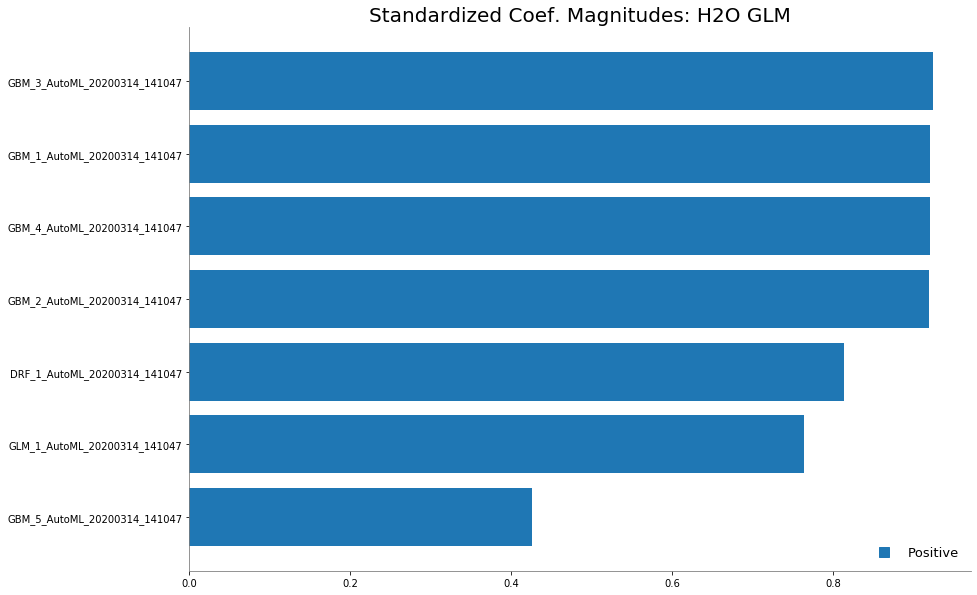

In [67]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
%matplotlib inline
metalearner.std_coef_plot()

In [117]:
pred=aml.predict(testh)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [118]:
pred

predict,p0,p1
0,1,6.14776e-16
0,1,1.00394e-15
0,1,6.17752e-16
0,1,1.04519e-15
0,1,6.25063e-16
0,1,6.44604e-16
0,1,6.35359e-16
0,1,7.40883e-16
0,1,7.97853e-16
0,1,9.71536e-16


In [126]:
h2o.get_model(model_id= GBM_3_AutoML_20200314_141047)

NameError: name 'GBM_3_AutoML_20200314_141047' is not defined

In [88]:
aml.confusion_matrix(valid=True)

AttributeError: 'H2OAutoML' object has no attribute 'confusion_matrix'

In [41]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(train,pred))
print("Accuracy:",metrics.accuracy_score(train, pred))
metrics.confusion_matrix(train, pred)

auth_revenue,decile_rank_last_1_yr,time_bn_wm_and_home,time_bn_last_wm_and_home,no_items_lt,auth_revenue_lt,no_divisions_lt,auth_qty_lt,no_items_lt_edl,auth_revenue_lt_edl,no_super_depts_lt_edl,auth_qty_lt_edl,avg_wm_order_gap,avg_ent_order_gap,avg_enp_order_gap,avg_edl_order_gap,avg_fashion_order_gap,aov_wm,ent_aov,enp_aov,edl_aov,fashion_aov,first_order_wm_gmv,holiday_gmv,non_holiday_gmv,total_gmv,avg_basket_value_delta,avg_basket_size_delta,no_home_visits,no_wm_visits,no_home_pdp_visits,home_pdp_conversion_rate,no_home_page_views,no_wm_page_views,no_divisions_per_order,no_super_depts_per_order,no_depts_per_order,top_brand_revenue_percent,avg_dwell_time,hh_adult_qty,hh_children_qty,wm_pdp_visits,avg_basket_value_delta_flag,Flag,gender_M,gender_OTHERS,gender_U,age_group_GENX,age_group_GENZ,age_group_MILLENNIALS,age_group_OTHERS,age_group_SENIORS,income_group_LOW,income_group_MEDIUM,income_group_OTHERS,ethnicity_ASIANS,ethnicity_CAUCASIANS,ethnicity_HISPANICS,ethnicity_OTHERS,ethnicity_UNKNOWN,urbanicity_RURAL,urbanicity_SEMI URBAN,urbanicity_URBAN
250.68,35,2.7,2.7,4,44.63,3,4,1,4.69,1,1,1.8,0,0,1.8,0.666667,48.1575,0,14.88,24.95,38.975,44.63,138.63,54,192.63,-3.12333,1,2,16,2,0.5,0.625,44.1875,1.75,2.5,2.5,0.144,490.875,1,0,7,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
324.76,26,1.76667,1.76667,1,5.18,1,1,1,5.18,1,1,0,0,0,0,0,5.18,0,0,5.18,0,5.18,0,5.18,5.18,0,0,1,2,1,1,21,131,1,1,1,0,2247.5,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
57.86,86,2.46667,2.46667,1,19.99,1,1,0,0,0,0,0,0,0,0,0,19.99,0,19.99,0,0,19.99,0,19.99,19.99,0,0,6,8,6,0.333333,3.375,62.875,1,1,1,0,2938.38,0,0,7,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
104.84,68,6.43333,6.43333,1,6.66,1,1,0,0,0,0,0,0,0,0,0,6.66,0,0,0,6.66,6.66,0,6.66,6.66,0,0,3,4,2,0.5,7.5,21,1,1,1,0,823,1,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
36.46,94,65.2333,7.9,1,28.97,1,1,0,0,0,0,4.06667,1.56667,0,0,4.06667,27.15,34.345,0,0,19.955,46.17,10.94,97.66,108.6,6.01,0,1,1,1,1,11,19,1,1,1,0.305088,278,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
143,57,11.1667,11.1667,2,13.88,1,3,1,8.68,1,4,7.16667,0,0,7,7.16667,20.26,0,7.39,17.0075,11.94,13.88,37.38,63.92,101.3,-5.875,-0.75,1,5,1,1,11.2,37.6,1.6,1.8,1.8,0.338912,362.2,0,0,4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
90.46,73,75.8333,5.1,1,23.95,1,1,0,0,0,0,4.6,0,0,0,0,54.185,38.53,69.84,0,0,1.14,0,108.37,108.37,0,0,1,10,1,1,1.4,48.5,1,1.5,1.5,0,777.5,1,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
180.66,48,16.1333,4.1,1,359.99,1,1,2,50.96,1,2,3.43333,0.466667,0,0,0,113.147,178.37,48.53,50.96,44.28,199,535.11,143.77,678.88,63.142,0,4,7,3,0.333333,15.5714,21.1429,1,1.16667,1.16667,0,468.714,3,0,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
85.76,75,40.7667,1.36667,4,42.98,3,7,1,5.54,1,2,0,0,0,0,0,42.98,14.6,22.84,5.54,0,35,0,42.98,42.98,0,0,2,8,2,0.5,2.125,6.625,3,3,3,0,338.625,0,0,6,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
499.46,14,26.2,7.8,1,7.25,1,1,0,0,0,0,0,0,0,0,0,7.25,0,7.25,0,0,7.69,0,7.25,7.25,0,0,5,13,5,0.2,1.92308,7.23077,1,1,1,0,539.846,1,0,11,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


ValueError: Expected array-like (array or non-string sequence), got 

In [139]:
x_train.shape

(262142, 62)

In [140]:
y_train.shape

(262142,)

In [141]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [142]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [143]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [144]:
predictions

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [145]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
metrics.confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85140
           1       1.00      1.00      1.00     27207

    accuracy                           1.00    112347
   macro avg       1.00      1.00      1.00    112347
weighted avg       1.00      1.00      1.00    112347

Accuracy: 0.9999910990057589


array([[85139,     1],
       [    0, 27207]], dtype=int64)

In [153]:
raw_data['Flag']

0         1
1         1
2         1
3         1
4         1
         ..
374484    0
374485    0
374486    0
374487    0
374488    0
Name: Flag, Length: 374489, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data, raw_data['Flag'], test_size=0.3, random_state=0)

In [146]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic.fit(x_train, y_train)
logistic_prediction= logistic.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [147]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,logistic_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, logistic_prediction))
metrics.confusion_matrix(y_test, logistic_prediction)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85140
           1       1.00      1.00      1.00     27207

    accuracy                           1.00    112347
   macro avg       1.00      1.00      1.00    112347
weighted avg       1.00      1.00      1.00    112347

Accuracy: 0.998744959812011


array([[85131,     9],
       [  132, 27075]], dtype=int64)

In [154]:
x_train.shape

(262142, 62)

In [155]:
y_train.shape

(262142,)